# Decision Tree Regression for House SalePrice prediction

Import the required libraries.
Pandas will be used for reading data file and various other operations on the dataframe.
Numpy will be used for mathematical operations on the data.
sklearn.metrics and sklearn will be used for calculating accuracy and comparing the performance of the sklearn DecisionTreeRegressor with my own implementation of the same.
math and random libraries will be used for various other operations

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Data PreProcessing

Read the data from the path and see the contents and columns and the datatypes.Check which values are null.Which of the columns are sparse and decide on the basis of this which columns to drop.

In [119]:
df=pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
Id               1000 non-null int64
MSSubClass       1000 non-null int64
MSZoning         1000 non-null object
LotFrontage      825 non-null float64
LotArea          1000 non-null int64
Street           1000 non-null object
Alley            50 non-null object
LotShape         1000 non-null object
LandContour      1000 non-null object
Utilities        1000 non-null object
LotConfig        1000 non-null object
LandSlope        1000 non-null object
Neighborhood     1000 non-null object
Condition1       1000 non-null object
Condition2       1000 non-null object
BldgType         1000 non-null object
HouseStyle       1000 non-null object
OverallQual      1000 non-null int64
OverallCond      1000 non-null int64
YearBuilt        1000 non-null int64
YearRemodAdd     1000 non-null int64
RoofStyle        1000 non-null object
RoofMatl         1000 non-null object
Exterior1st      1000 non-nul

Drop very sparse columns i.e columns which have more than 80% of data as NA/NULL as they wont impact our model's performance significantly.Did some operations like renaming and replacing some values for convenience.

In [120]:
df=df.drop(["Id","Alley","PoolQC","MiscFeature","Fence","FireplaceQu"],axis=1)
df=df.rename(columns={"SalePrice":"label"})
df["MSZoning"].replace('C (all)', 'C',inplace=True)

nalist below contains the list/names of columns which contain the NA value.We observe which columns are sparse and which of them can be used through some imputation.

In [121]:
nalist=df.columns[df.isna().any()].tolist()
nalist

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Perform Data Imputation.Change the integer/continuous attributes with its mean and categorical attributes with the mode,and fill them back into the dataframe.And verify that there are no null values and unneccessary columns remaining.

In [122]:
mean_frontage=df.LotFrontage.mean()
mode_MasVnrType=df.MasVnrType.mode()[0]
mean_MasVnrArea=df.MasVnrArea.mean()
mode_BsmtQual=df.BsmtQual.mode()[0]
mode_BsmtCond=df.BsmtCond.mode()[0]
mode_BsmtExposure=df.BsmtExposure.mode()[0]
mode_BsmtFinType1=df.BsmtFinType1.mode()[0]
mode_BsmtFinType2=df.BsmtFinType2.mode()[0]
mode_Electrical=df.Electrical.mode()[0]
mode_GarageType=df.GarageType.mode()[0]
mean_GarageYrBlt=df.GarageYrBlt.mean()
mode_GarageFinish=df.GarageFinish.mode()[0]
mode_GarageQual=df.GarageQual.mode()[0]
mode_GarageCond=df.GarageCond.mode()[0]
df=df.fillna({"LotFrontage":mean_frontage,"MasVnrType":mode_MasVnrType,"MasVnrArea":mean_MasVnrArea,"BsmtQual":mode_BsmtQual,"BsmtCond":mode_BsmtCond,"BsmtExposure":mode_BsmtExposure,"BsmtFinType1":mode_BsmtFinType1,"BsmtFinType2":mode_BsmtFinType2,"Electrical":mode_Electrical,"GarageType":mode_GarageType,"GarageYrBlt":mean_GarageYrBlt,"GarageFinish":mode_GarageFinish,"GarageQual":mode_GarageQual,"GarageCond":mode_GarageCond})
global COLUMN_NAMES
global TYPES_OF_FEATURES
TYPES_OF_FEATURES=continuous_or_categorical(df)
COLUMN_NAMES=df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 75 columns):
MSSubClass       1000 non-null int64
MSZoning         1000 non-null object
LotFrontage      1000 non-null float64
LotArea          1000 non-null int64
Street           1000 non-null object
LotShape         1000 non-null object
LandContour      1000 non-null object
Utilities        1000 non-null object
LotConfig        1000 non-null object
LandSlope        1000 non-null object
Neighborhood     1000 non-null object
Condition1       1000 non-null object
Condition2       1000 non-null object
BldgType         1000 non-null object
HouseStyle       1000 non-null object
OverallQual      1000 non-null int64
OverallCond      1000 non-null int64
YearBuilt        1000 non-null int64
YearRemodAdd     1000 non-null int64
RoofStyle        1000 non-null object
RoofMatl         1000 non-null object
Exterior1st      1000 non-null object
Exterior2nd      1000 non-null object
MasVnrType       1000 non

In [123]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,label
0,60,RL,99.000000,12099,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,354000
1,20,RL,89.000000,13214,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,378500
2,120,RM,32.000000,4500,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,153500
3,160,FV,30.000000,3000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,New,Partial,173733
4,20,RL,71.310303,6897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,120,RL,40.000000,6792,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2006,New,Partial,202665
996,30,RL,85.000000,10625,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,77,0,0,0,400,5,2010,COD,Abnorml,83000
997,85,RL,71.310303,9101,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,165500
998,20,RL,75.000000,13125,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2008,WD,Normal,208900


# Helper Functions

Calculate MSE returns the mean square error of the last column(here price).If there are no values present(there are no rows) then return mse as 0 else return the mean of the column.

In [125]:
def calculate_mse(data):
        if len(data[:,-1])==0:
          mse=0
        else:
          #data[:-,1] is the last column which contains the labels of the price/value/label  
          mse= np.mean((data[:,-1]-np.mean(data[:,-1]))**2)
        return mse

Overall MSE basically calculates the weighted sum of mean squares of the left subtree and the right subtree

In [126]:
def calculate_overall_mse(data_less_than,data_more_than):
        n_data_points=len(data_less_than)+len(data_more_than)
        #weights of both types of data
        weighted_mse=((len(data_less_than)/n_data_points)*calculate_mse(data_less_than)+(len(data_more_than)/n_data_points)*calculate_mse(data_more_than))
        return weighted_mse

Find split positions gives the unique values for each column/attribute on which we can get a split.

In [127]:
def find_split_positions(data):
    #will contain list of potentila  split values for that feature/column
        split_positions={}
        rows,num_of_columns=data.shape
    #exclude the label column
        for curr_column in range(num_of_columns-1):
            values=data[:,curr_column]
            unique_values=np.unique(values)
            split_positions[curr_column]=unique_values
        return split_positions

The following function takes dataframe as input and returns whether the column/feature is continuous or categorical in nature and returns a list saying the same.

In [128]:
#determine type of feature
def continuous_or_categorical(df):
        #to see the number of unique values in each type of feature
        conti_or_categ=[]
        #to see if a column contains a high value of categories
        conti_or_categ=[]
        for column in df.columns:
            if df.dtypes[column] == "object":
                conti_or_categ.append("categorical")
            else:
                conti_or_categ.append("continuous")    
        return conti_or_categ

The following function divides the data on the basis of the given column name and the value corresponding to that column.If the split value is continuous then it uses >=,< condition else it uses ==,!= conditions

In [129]:
def split_data(data,split_column,split_value):
    #now insetead of comparing features,we first find out if it is continuous or categorical
    #if continuous we can compare with <= or >= if categorical we use ==
        split_column_values=data[:,split_column]
        type_of_feature=TYPES_OF_FEATURES[split_column]
        if type_of_feature=="continuous":
            data_less_than_split=data[split_column_values<=split_value]
            data_more_than_split=data[split_column_values>split_value]
        else:
            data_less_than_split=data[split_column_values==split_value]
            data_more_than_split=data[split_column_values!=split_value]
        return data_less_than_split,data_more_than_split


This is the main Decision Tree Algorithm.We pass dataframe so that we dont need to pass train or test after converting to a 2-d array.This function takes min_samples to check if there are sufficient data points in that child and to avoid unneccesary splitting of the node.If less than min_samples,we can return the mean of the data.This way the height of the tree gets reduced and unncessary calculations/splits are avoided.We also pass the max-depth in our tree so that we dont keep on recursing and splitting the data even if we have sufficent depth and accuracy.This is called PRUNING of the tree 

The algo works as follows:
It finds the possible splitting positions available for us from each attribute and stores them.
Now for each column and each value of the column we check if the mean square error is the minimum mean square error until now or not.Which ever column and value gives the best(least)Mean square error after splitting becomes our splitting criteria for that node.
Then we split the data on the basis of above values.
Each node of our tree as the following format for continuous data {spliting critera <= satisfied: not_satisified} and for categorical data {spliting critera != satisfied: not_satisified} The 'satisfied' becomes the left child of the node and  'not satisfied' becomes the right child of the node.
We call this recursively until we reach the leaf which happens when we reach the max depth or the number of rows,values are less than min samples.
After reaching the leaf we simply return the mean of the remaining data present in that leaf.This will be our prediction.


In [130]:
def opt_decision_tree_algorithm(df,counter=0,min_samples=7,max_depth=5,first_iteration=True):
        if first_iteration==True:
            data=df.values
        else:
            data=df #called as 2-d array
    
        #basecase 
        if ((len(data)<min_samples) or (counter==max_depth)):
            return np.mean(data[:,-1])

        else:
            counter+=1
            first_iteration=False
            split_positions=find_split_positions(data)
       
        #finding the split which gives the least mean square error
        best_mse_lst =list()
        for column_index in split_positions:
            for value in split_positions[column_index]:
                data_less_than,data_more_than=split_data(data,column_index,value)
                n_data_points=len(data_less_than)+len(data_more_than)
                    #weights of both types of data(weighted mse)
                current_mse=((len(data_less_than)/n_data_points)*calculate_mse(data_less_than)+(len(data_more_than)/n_data_points)*calculate_mse(data_more_than))
                best_mse_lst.append((current_mse, column_index, value))

        best_mse, split_column, split_value = min(best_mse_lst)
        data_less_than,data_more_than=split_data(data,split_column,split_value)
        
        #checkforemptyclass
        if len(data_less_than)==0 or len(data_more_than)==0:
            return np.mean(data[:-1])
        
        #instantiate subtree (recurse) tells the column name where split
        #to get only the inndex use split_column in .format()
        feature_name=COLUMN_NAMES[split_column]
        type_of_feature=TYPES_OF_FEATURES[split_column]
        if type_of_feature=="continuous":
            criteria="{} <= {}".format(feature_name,split_value)
        else:
            criteria="{} == {}".format(feature_name,split_value)
        
        tree_node={criteria: []}
        
        #find_subtree_answers
        left_subtree_condn=opt_decision_tree_algorithm(data_less_than,counter,min_samples,max_depth,first_iteration)
        right_subtree_condn=opt_decision_tree_algorithm(data_more_than,counter,min_samples,max_depth,first_iteration)
        
        #append only the name if not splitting
        if left_subtree_condn==right_subtree_condn:
            tree_node=right_subtree_condn
        else:
            tree_node[criteria].append(left_subtree_condn)
            tree_node[criteria].append(right_subtree_condn)

        return tree_node

The function below is used for traversing along the constructed decsion tree frome above function.This matches the corresponding attributes and checks the conditions mentioned in the nodes until it reaches a leaf,at which point the mean of the data points present in leaf is returned. 

In [131]:
def get_decision(decision_tree,criteria,value,operator,feature,df_row):
        if(operator=="<="):
            value=float(value)
                    #ask question
            if df_row[feature]<=value:
                trueorfalse=decision_tree[criteria][0]
            else:
                trueorfalse=decision_tree[criteria][1]
                        #the value can be a integer or a string
        elif(operator!="<="):
            if str(df_row[feature])==value:
                trueorfalse=decision_tree[criteria][0]
            else:
                trueorfalse=decision_tree[criteria][1]
        return trueorfalse        

In [132]:
def predict_example(df_row,decision_tree):
         #get the splitting_criteria(key)
        criteria=list(decision_tree.keys())[0]
        #get the answers(elements of the string)
        feature,operator,value=criteria.split(" ")
        #ask question
        trueorfalse=get_decision(decision_tree,criteria,value,operator,feature,df_row)
        if not isinstance(trueorfalse,dict):
            return trueorfalse
        else:
            sub_tree=trueorfalse
            return predict_example(df_row,sub_tree)


The function below splits the data into training data and testing data in two parts as per the size passed.

In [133]:
#train test split
def train_test_split(df,test_size):
    df_size=len(df)
    if isinstance(test_size,float):#if test size is passed as a proportion
        test_size=round(test_size*df_size)
    #pick random samples from the data for train test split
    indexes=df.index.tolist()
    test_indices=random.sample(population=indexes,k=test_size)
    #now putting the values of train and test data into the respective df's
    test_df=df.loc[test_indices]
    cropped_df=df.drop(test_indices)
    train_df=cropped_df
    return train_df,test_df

# Validation and Hyperparameter tuning

Now we split the  original data into train and validation data.We keep the training size 75% and validation size 25%.

In [134]:
train_df,val_df=train_test_split(df,0.25)

Now to obtain the optimal value of maximum depth and minimum samples we perform cross validation.The split which gives best train and cross validation score will be our final hyperparameters for test data.We use the R-square test to evaluate our model.Any model which gives R-square score >=0.5 is considered to be a good mode,however improvements are still possible.

In [135]:
best_validation_score=0
best_training_score=0
best_max_depth=0
best_min_samples=0
train_labels=train_df.label
val_labels=val_df.label
train_labels=train_labels.to_numpy()
val_labels=val_labels.to_numpy()
for max_depth in range(5,10):
    for min_samples in range(5,20,4):
        current_tree=opt_decision_tree_algorithm(train_df,max_depth=max_depth, min_samples=min_samples,first_iteration=True)
        train_predictions=train_df.apply(predict_example, args=(current_tree,), axis=1)
        val_predictions=val_df.apply(predict_example, args=(current_tree,), axis=1)
        curr_train_score=(r2_score(train_labels, train_predictions.to_numpy()))
        curr_val_score=(r2_score(val_labels, val_predictions.to_numpy()))
        print('-----------------------------------------------------------------------')
        if(curr_train_score >= best_training_score or curr_val_score>=best_validation_score):
            print("current_max_depth : ",max_depth)
            print("current_min_samples : ",min_samples)
            print("current_training score : ",curr_train_score)
            print("current_validation score : ",curr_val_score)
        

-----------------------------------------------------------------------
current_max_depth :  5
current_min_samples :  5
current_training score :  0.7944642754138669
current_validation score :  0.7001179885987898
-----------------------------------------------------------------------
current_max_depth :  5
current_min_samples :  9
current_training score :  0.7857102362314975
current_validation score :  0.6944631231868471
-----------------------------------------------------------------------
current_max_depth :  5
current_min_samples :  13
current_training score :  0.7857102362314975
current_validation score :  0.6944631231868471
-----------------------------------------------------------------------
current_max_depth :  5
current_min_samples :  17
current_training score :  0.7857102362314975
current_validation score :  0.6944631231868471
-----------------------------------------------------------------------
current_max_depth :  6
current_min_samples :  5
current_training score :  0.84

From Above we see that after some trade off between the two scores,we can choose our hyperparameters as max_depth=7
and min_samples=8

# Testing

Now we test our data with the above hyperparameters we got from cross-validation.We perfrom  similar changes to test data as we did initially to fit our model's needs.

In [137]:
df_test=pd.read_csv("test.csv")
df_labels=pd.read_csv("test_labels.csv")
df_test=df_test.join(df_labels,lsuffix='_test', rsuffix='_labels')
df_test=df_test.rename(columns={"Labels":"label"})

In [138]:
df_test=df_test.drop(["Id_test","Alley","PoolQC","MiscFeature","Fence","FireplaceQu","Id_labels"],axis=1)
tmean_frontage=df_test.LotFrontage.mean()
tmode_MasVnrType=df_test.MasVnrType.mode()[0]
tmean_MasVnrArea=df_test.MasVnrArea.mean()
tmode_BsmtQual=df_test.BsmtQual.mode()[0]
tmode_BsmtCond=df_test.BsmtCond.mode()[0]
tmode_BsmtExposure=df_test.BsmtExposure.mode()[0]
tmode_BsmtFinType1=df_test.BsmtFinType1.mode()[0]
tmode_BsmtFinType2=df_test.BsmtFinType2.mode()[0]
tmode_GarageType=df_test.GarageType.mode()[0]
tmean_GarageYrBlt=df_test.GarageYrBlt.mean()
tmode_GarageFinish=df_test.GarageFinish.mode()[0]
tmode_GarageQual=df_test.GarageQual.mode()[0]
tmode_GarageCond=df_test.GarageCond.mode()[0]
df_test["MSZoning"].replace('C (all)', 'C', inplace=True)

df_test=df_test.fillna({"LotFrontage":tmean_frontage,"MasVnrType":tmode_MasVnrType,"MasVnrArea":tmean_MasVnrArea,"BsmtQual":tmode_BsmtQual,"BsmtCond":tmode_BsmtCond,"BsmtExposure":tmode_BsmtExposure,"BsmtFinType1":tmode_BsmtFinType1,"BsmtFinType2":tmode_BsmtFinType2,"GarageType":tmode_GarageType,"GarageYrBlt":tmean_GarageYrBlt,"GarageFinish":tmode_GarageFinish,"GarageQual":tmode_GarageQual,"GarageCond":tmode_GarageCond})


Now we choose and train the model on the depth and min_samples we got from validation and run it on our test data and then we calculate the R-square score.


In [139]:
best_max_depth=7
best_min_samples=8

test_tree=opt_decision_tree_algorithm(train_df,max_depth=best_max_depth, min_samples=best_min_samples,first_iteration=True)

test_predictions=df_test.apply(predict_example, args=(test_tree,), axis=1)

test_labels=df_test.label
test_labels=test_labels.to_numpy()

test_score=(r2_score(test_labels, test_predictions.to_numpy()))

print(test_score)

0.6822396954997787


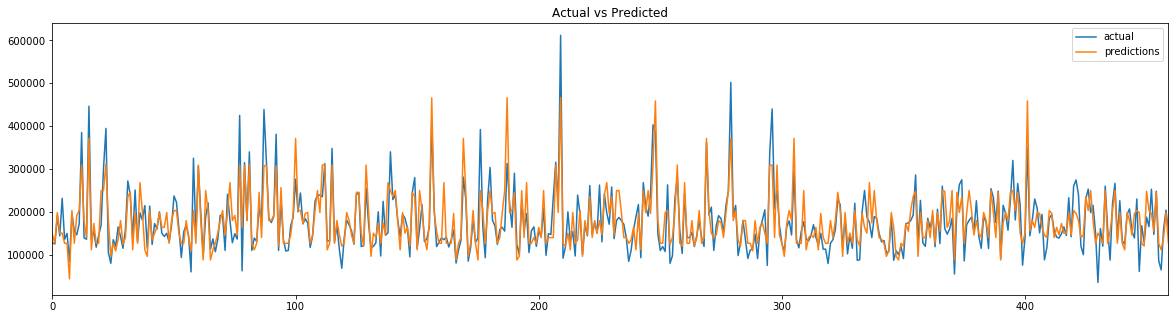

In [140]:
plot_data = pd.DataFrame({"actual": test_labels, "predictions": test_predictions})
    
plot_data.plot(figsize=(20, 5), title="Actual vs Predicted")
    

# Evaluation metrics

# 1.R-square test

It is also called co-efficient of determination.R-squared is a statistical measure of how close the data are to the fitted regression line.
The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model.
R-squared = Explained variation / Total variation
R-squared is always between 0 and 100%:
0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

In [141]:
rsq_score=(r2_score(test_labels, test_predictions.to_numpy()))
print(rsq_score)

0.6822396954997787


# 2. Mean Square Error

In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

In [142]:
mse_score=mean_squared_error(test_labels, test_predictions.to_numpy())
print(mse_score)

1679301256.5950239


# 3. Mean Absolute Error

Mean Absolute Error (MAE) is the average vertical distance between each point and the identity line. MAE is also the average horizontal distance between each point and the identity line

In [143]:
mae_score=mean_absolute_error(test_labels, test_predictions.to_numpy())
print(mae_score)

29420.785550281023


# BaseLine Accuracy

# 1.Simple Mean Model (SMM)

A simple mean model like its name simply returns the mean of all the data which the classifier has seen.The deviation of this mean from the real values in the test data will establish a baseline score for our model.

In [144]:
smm_predictions=[]
train_mean=np.mean(train_labels)
for i in range(test_labels.shape[0]):
    smm_predictions.append(train_mean)
smm_predictions=np.array(smm_predictions)
print("R-squared score : ",r2_score(test_labels,smm_predictions))
print("Mean Square Error  : ",mean_squared_error(test_labels,smm_predictions))
print("Mean Absolute Error  : ",mean_absolute_error(test_labels,smm_predictions))

R-squared score :  -0.005765959029404799
Mean Square Error  :  5315277002.566576
Mean Absolute Error  :  54497.9640057971
